In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("E:/Github/Mall Customers/Mall_Customers.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Check for missing values

In [9]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


# There is no missing values

# Check for duplicates

In [10]:
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


# Summary Statistics

In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Drop CustomerID column

In [14]:
df_clean = df.drop(columns=['CustomerID'])

In [15]:
df_clean.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# Count plot of gender

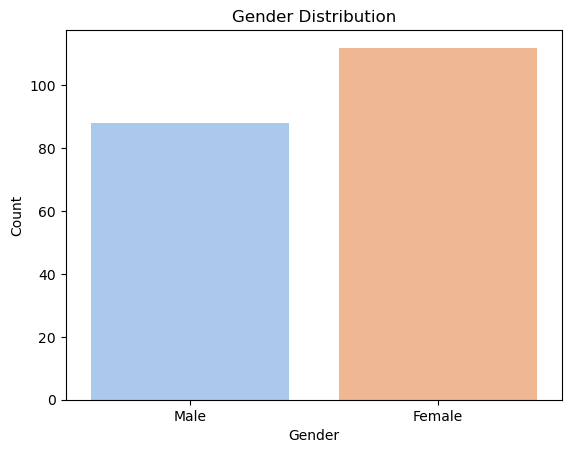

In [16]:
sns.countplot(x='Gender', data=df_clean, palette='pastel')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# Plotting histograms for Age, Income, and Spending Score

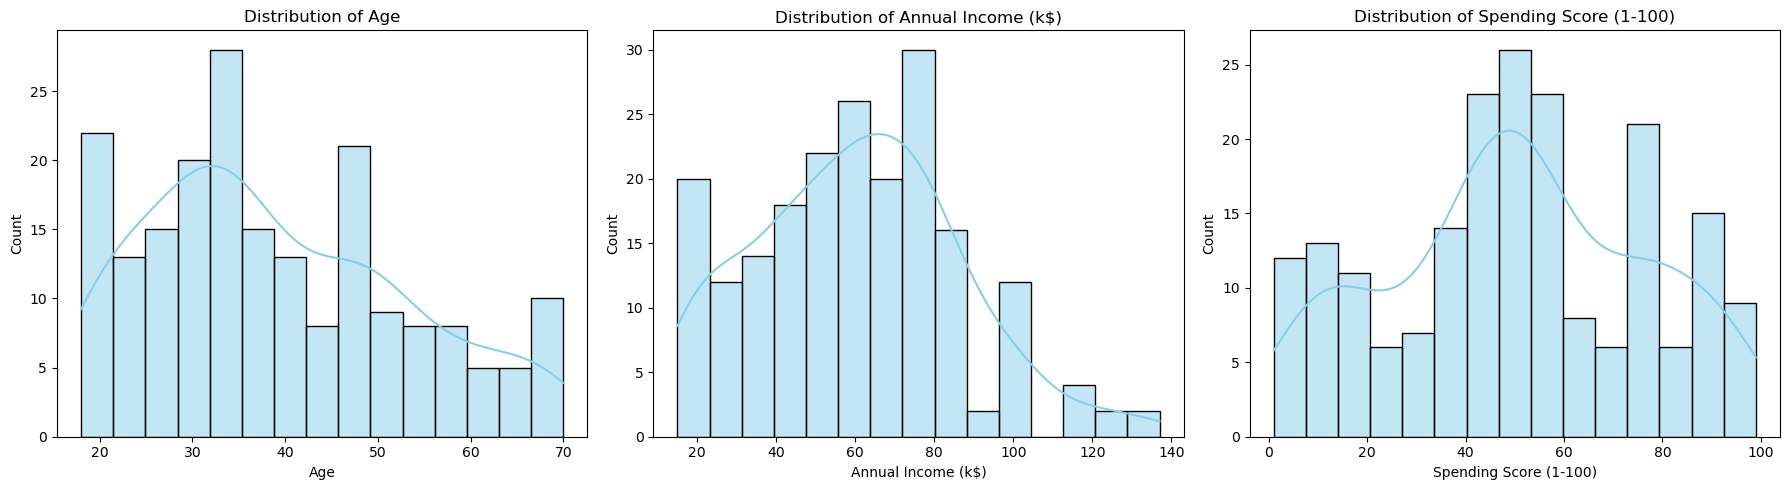

In [27]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

plt.figure(figsize=(18, 5))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.histplot(df_clean[feature], bins=15, kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Boxplots for numeric columns

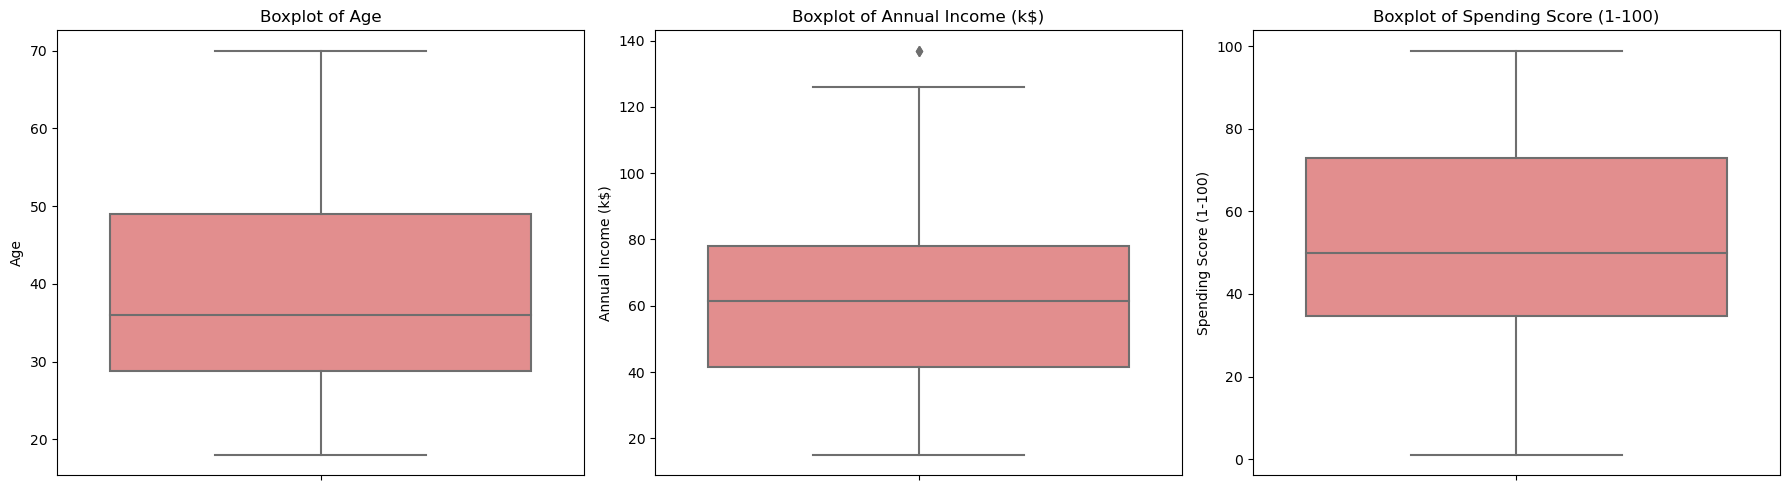

In [30]:
plt.figure(figsize=(18, 5))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df_clean[feature], color='lightcoral')
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

# Scatter plot to see relationship

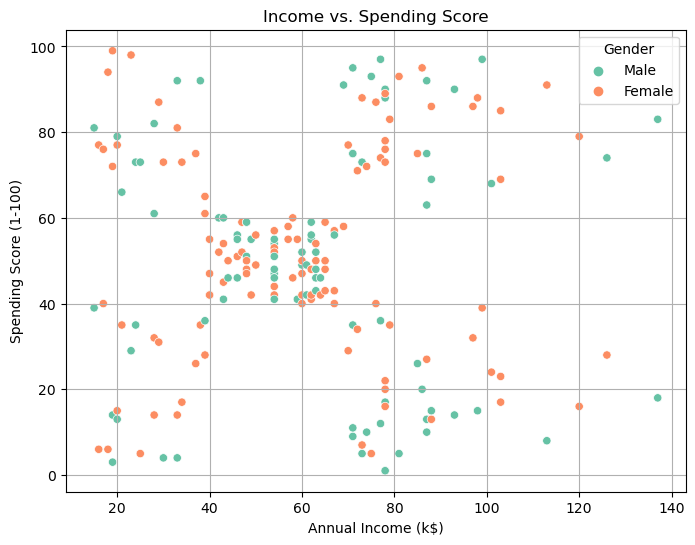

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_clean, hue='Gender', palette='Set2')
plt.title("Income vs. Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.grid(True)
plt.show()

# Select features for clustering

In [34]:
X = df_clean[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Scale the data

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try different numbers of clusters and record inertia (WCSS)

In [45]:

inertia = []
K = range(1, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)


# Plot elbow curve

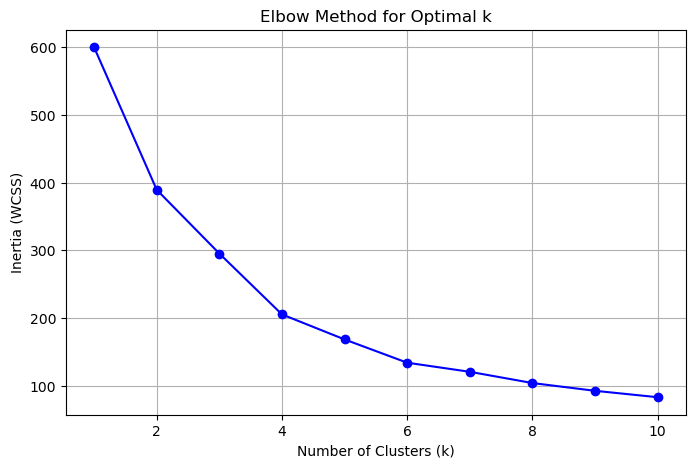

In [46]:
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

# Fit KMeans with k=5

In [56]:
kmeans = KMeans(n_clusters=5, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(X_scaled)

# View sample with cluster

In [48]:
df_clean.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,5
3,Female,23,16,77,0
4,Female,31,17,40,5


# Visualize clusters based on 2 key features

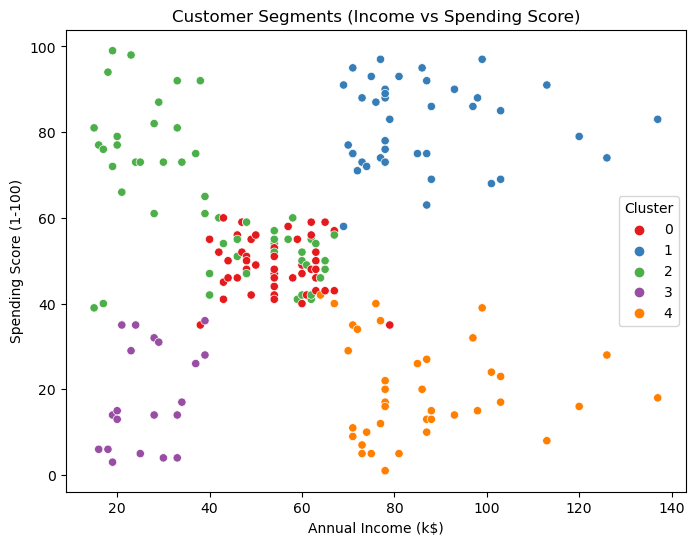

In [57]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='Set1',
    data=df_clean
)
plt.title('Customer Segments (Income vs Spending Score)')
plt.show()

# Group by cluster and get the mean of each feature

In [60]:
cluster_summary = df_clean.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)
cluster_summary

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,55.6,54.4,48.9
1,32.9,86.1,81.5
2,25.2,41.1,62.2
3,46.2,26.8,18.4
4,39.9,86.1,19.4


In [61]:
df_clean['Cluster'].value_counts().sort_index()

0    47
1    40
2    54
3    20
4    39
Name: Cluster, dtype: int64

# Normalize the cluster summary for radar chart

In [63]:
normalized = cluster_summary.copy()
for column in normalized.columns:
    normalized[column] = (normalized[column] - normalized[column].min()) / (normalized[column].max() - normalized[column].min())


# Plot

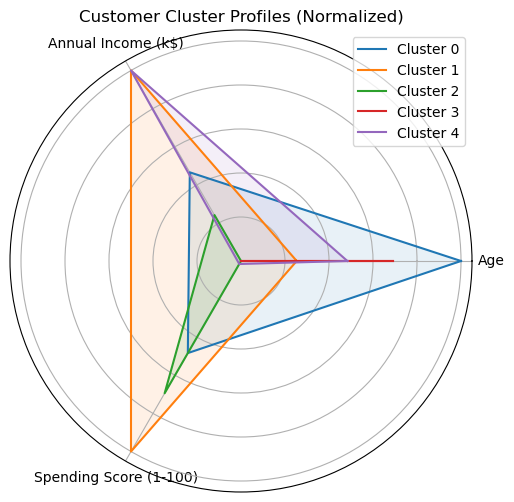

In [64]:
labels = normalized.columns
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(polar=True))

for idx, row in normalized.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=f'Cluster {idx}')
    ax.fill(angles, values, alpha=0.1)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Customer Cluster Profiles (Normalized)')
plt.legend()
plt.show()

### 💡 Business Insights

- **Cluster 0**: Young, low income, very high spending – likely impulsive or trend-driven shoppers. 🛍️ Target with flashy promotions.
- **Cluster 1**: Older, moderate income, low spending – possibly budget-conscious. Offer loyalty programs or discounts.
- **Cluster 2**: Mid-age, high income, low spending – maybe cautious spenders. Engage with premium loyalty campaigns.
- **Cluster 3**: Mid-age, high income, high spending – ideal premium customers. 🎯 Upsell luxury products.
- **Cluster 4**: Younger, moderate income, moderate spending – nurture for future high-value potential.

### 🧭 Recommendations

- Use clusters to personalize marketing strategies.
- Focus on Cluster 3 for high-margin items.
- Engage Cluster 0 with fast-moving trendy campaigns.
- Build loyalty with Cluster 1 to increase their spending.